# Example with high-resolution CMIP6 models (~100 km) using Pangeo catalog 

### Time period

We will use data from 1985 to 2014.

### Variables 

| shortname     |             Long name                   |      Units    |  levels |
| ------------- |:---------------------------------------:| -------------:|--------:|
|  prsn         |    Snowfall Flux                        | [kg m-2 s-1]  | surface |
| clw           |    Mass Fraction of Cloud Liquid Water  |  [kg kg-1]    |    ml   |
| cli           |    Mass Fraction of Cloud Ice           | [kg kg-1]     |    ml   |
| tas           |    Near-Surface Air Temperature         |   [K]         | surface |
| ta            |    Air Temperature                      |  [K]          |    ml   |


## Import python packages

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import cartopy.crs as ccrs
import cartopy as cy
import matplotlib.pyplot as plt
import xesmf as xe
from glob import glob
import pandas as pd
import numpy as np
from cmcrameri import cm


%matplotlib inline


# reload imports
%load_ext autoreload
%autoreload 2

### Open CMIP6 online catalog

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

### Search correspnding data

In [3]:
list_models = ['AWI-CM-1-1-MR',
               'BCC-CSM2-MR',
               'CAMS-CSM1-0',
               'CAS-ESM2-0',
               'CESM2',
               'CESM2-WACCM-FV2',
               'CMCC-CM2-HR4',
               'CMCC-CM2-SR5',
               'CMCC-ESM2',
               'E3SM-1-0',
               'E3SM-1-1',
               'E3SM-1-1-ECA',
               'EC-Earth3',
               'EC-Earth3-AerChem',
               'EC-Earth3-CC',
               'EC-Earth3-Veg',
               'FGOALS-f3-L',
               'FIO-ESM-2-0',
               'GFDL-CM4',
               'GFDL-ESM4',
               'HadGEM3-GC31-MM',
               'INM-CM4-8',
               'INM-CM5-0',
               'MPI-ESM1-2-HR',
               'MRI-ESM2-0',
               'NorESM2-MM',
               'SAM0-UNICON',
               'TaiESM1', 
               ]



In [4]:
variable_id=['prsn']
cat = col.search(source_id=list_models, experiment_id=['historical'], variable_id=variable_id[0], member_id=['r1i1p1f1'])
cat.df

activity_id       institution_id          source_id experiment_id  \
0         CMIP            NOAA-GFDL           GFDL-CM4    historical   
1         CMIP            NOAA-GFDL           GFDL-CM4    historical   
2         CMIP            NOAA-GFDL           GFDL-CM4    historical   
3         CMIP            NOAA-GFDL           GFDL-CM4    historical   
4         CMIP            NOAA-GFDL           GFDL-CM4    historical   
5         CMIP                  BCC        BCC-CSM2-MR    historical   
6         CMIP                  BCC        BCC-CSM2-MR    historical   
7         CMIP                  AWI      AWI-CM-1-1-MR    historical   
8         CMIP                  MRI         MRI-ESM2-0    historical   
9         CMIP                  SNU        SAM0-UNICON    historical   
10        CMIP                  SNU        SAM0-UNICON    historical   
11        CMIP                  INM          INM-CM4-8    historical   
12        CMIP                  INM          INM-CM4-8    historical   
13        CMIP                  MRI         MRI-ESM2-0    historical   
14        CMIP  EC-Earth-Consortium      EC-Earth3-Veg    historical   
15        CMIP                  INM          INM-CM5-0    historical   
16        CMIP                MPI-M      MPI-ESM1-2-HR    historical   
17        CMIP                MPI-M      MPI-ESM1-2-HR    historical   
18        CMIP            NOAA-GFDL          GFDL-ESM4    historical   
19        CMIP            NOAA-GFDL          GFDL-ESM4    historical   
20        CMIP         E3SM-Project           E3SM-1-0    historical   
21        CMIP  EC-Earth-Consortium          EC-Earth3    historical   
22        CMIP                  NCC         NorESM2-MM    historical   
23        CMIP                  NCC         NorESM2-MM    historical   
24        CMIP                 NCAR    CESM2-WACCM-FV2    historical   
25        CMIP         E3SM-Project           E3SM-1-1    historical   
26        CMIP                 NCAR              CESM2    historical   
27        CMIP         E3SM-Project       E3SM-1-1-ECA    historical   
28        CMIP  EC-Earth-Consortium          EC-Earth3    historical   
29        CMIP              AS-RCEC            TaiESM1    historical   
30        CMIP  EC-Earth-Consortium      EC-Earth3-Veg    historical   
31        CMIP                  CAS         CAS-ESM2-0    historical   
32        CMIP  EC-Earth-Consortium          EC-Earth3    historical   
33        CMIP                 CMCC       CMCC-CM2-SR5    historical   
34        CMIP                 CMCC       CMCC-CM2-SR5    historical   
35        CMIP  EC-Earth-Consortium  EC-Earth3-AerChem    historical   
36        CMIP              AS-RCEC            TaiESM1    historical   
37        CMIP                 CMCC       CMCC-CM2-HR4    historical   
38        CMIP             FIO-QLNM        FIO-ESM-2-0    historical   
39        CMIP  EC-Earth-Consortium       EC-Earth3-CC    historical   
40        CMIP                 CMCC          CMCC-ESM2    historical   

   member_id table_id variable_id grid_label  \
0   r1i1p1f1      day        prsn        gr1   
1   r1i1p1f1      day        prsn        gr2   
2   r1i1p1f1     Amon        prsn        gr1   
3   r1i1p1f1      3hr        prsn        gr2   
4   r1i1p1f1      3hr        prsn        gr1   
5   r1i1p1f1     Amon        prsn         gn   
6   r1i1p1f1      day        prsn         gn   
7   r1i1p1f1     Omon        prsn         gn   
8   r1i1p1f1     Amon        prsn         gn   
9   r1i1p1f1     Amon        prsn         gn   
10  r1i1p1f1      day        prsn         gn   
11  r1i1p1f1     Amon        prsn        gr1   
12  r1i1p1f1      day        prsn        gr1   
13  r1i1p1f1      day        prsn         gn   
14  r1i1p1f1     Amon        prsn         gr   
15  r1i1p1f1      day        prsn        gr1   
16  r1i1p1f1     Amon        prsn         gn   
17  r1i1p1f1      day        prsn         gn   
18  r1i1p1f1      day        prsn        gr1   
19  r1i1p1f1     A

In [5]:
cat.df['source_id'].unique()

array(['GFDL-CM4', 'BCC-CSM2-MR', 'AWI-CM-1-1-MR', 'MRI-ESM2-0',
       'SAM0-UNICON', 'INM-CM4-8', 'EC-Earth3-Veg', 'INM-CM5-0',
       'MPI-ESM1-2-HR', 'GFDL-ESM4', 'E3SM-1-0', 'EC-Earth3',
       'NorESM2-MM', 'CESM2-WACCM-FV2', 'E3SM-1-1', 'CESM2',
       'E3SM-1-1-ECA', 'TaiESM1', 'CAS-ESM2-0', 'CMCC-CM2-SR5',
       'EC-Earth3-AerChem', 'CMCC-CM2-HR4', 'FIO-ESM-2-0', 'EC-Earth3-CC',
       'CMCC-ESM2'], dtype=object)

### Create dictionary from the list of datasets we found

- This step may take several minutes so be patient!

In [6]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [7]:
list(dset_dict.keys())

['CMIP.BCC.BCC-CSM2-MR.historical.day.gn',
 'CMIP.CMCC.CMCC-CM2-HR4.historical.day.gn',
 'CMIP.E3SM-Project.E3SM-1-1.historical.Amon.gr',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.day.gr1',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.Amon.gr',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.day.gr1',
 'CMIP.EC-Earth-Consortium.EC-Earth3-CC.historical.day.gr',
 'CMIP.EC-Earth-Consortium.EC-Earth3-AerChem.historical.day.gr',
 'CMIP.NCAR.CESM2-WACCM-FV2.historical.Amon.gn',
 'CMIP.CAS.CAS-ESM2-0.historical.Amon.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1',
 'CMIP.CMCC.CMCC-CM2-SR5.historical.day.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.3hr.gr1',
 'CMIP.AS-RCEC.TaiESM1.historical.Omon.gn',
 'CMIP.CMCC.CMCC-CM2-SR5.historical.Amon.gn',
 'CMIP.NCC.NorESM2-MM.historical.Amon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3.historical.Amon.gr',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.day.gr',
 'CMIP.EC-Earth-Consortium.EC-Earth3.historical

### Use data as xarray to make a simple plot

In [8]:
ds = dset_dict['CMIP.NCC.NorESM2-MM.historical.Amon.gn']
ds

<xarray.Dataset>
Dimensions:    (lat: 192, bnds: 2, lon: 288, member_id: 1, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    prsn       (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 288, 192, 288), meta=np.ndarray>
Attributes: (12/54)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    variable_id:               prsn
    variant_label:             r1i1p1f1
    netcdf_tracking_ids:       hdl:21.14100/554fb9db-fdc0-425c-ac68-146cba77f...
    version_id:                v20191108
    intake_esm_varname:        ['prsn']
    intake_esm_dataset_key:    CMIP.NCC.NorESM2-MM.historical.Amon.gn

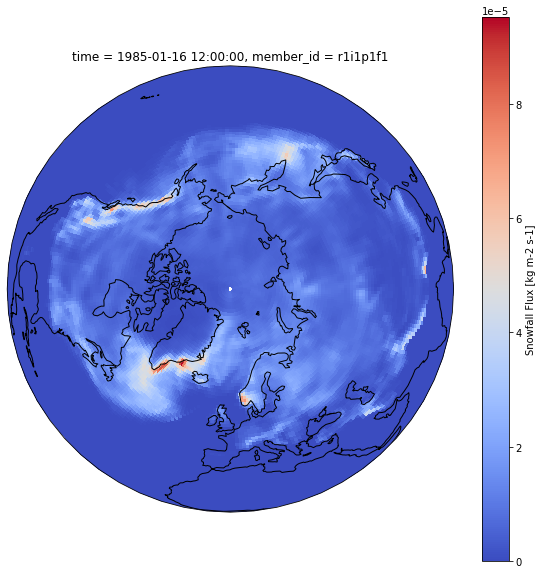

In [9]:
fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
ds['prsn'].sel(time=cftime.DatetimeNoLeap(1985, 1, 16, 12, 0, 0, 0)).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

### Get attributes (unique identifier)

In [10]:
ds.attrs['tracking_id']

'hdl:21.14100/554fb9db-fdc0-425c-ac68-146cba77f8cb\nhdl:21.14100/7235eb45-2da1-4bb8-bd16-467256066116\nhdl:21.14100/f2188a57-eff0-4ab9-8263-a6654349ee18\nhdl:21.14100/3fdefb99-9db8-44c1-9a51-885f6db62cfa\nhdl:21.14100/f50ff646-df59-4eac-8080-e5da16e5d778\nhdl:21.14100/2fde10fe-1e37-4a93-ac9c-a34b8de5a606\nhdl:21.14100/25d85a61-ac30-49cd-985b-66d121e4d388\nhdl:21.14100/a83c191a-d59b-4079-87f3-8caa874fce06\nhdl:21.14100/23263a30-65b9-4887-b46c-253af00861e6\nhdl:21.14100/cbea6d5b-68dd-4db8-9500-8e2d1bcf11be\nhdl:21.14100/457e8153-b9e8-4e0a-a339-4b0f37c2992d\nhdl:21.14100/28e89d10-aa46-4629-9f96-07eb18d42bcc\nhdl:21.14100/4fe3cdb8-8434-497d-88b3-9eff0eab6264\nhdl:21.14100/4b34d44c-c673-419e-b5bb-cd01c5f382d6\nhdl:21.14100/20b0215a-3e8e-474b-9513-a80f45805ad2\nhdl:21.14100/e484b416-c59c-4ac2-bd9a-9ba2a3047d6a\nhdl:21.14100/befe4a85-4c28-4df7-9efe-0232a75ad2bc'

# Regrid CMIP6 data to common NorESM2-MM grid

In [11]:
def to_DatetimeNoLeap(da):
    '''Takes a DataArray. Change the 
    calendar to DatetimeNoLeap.
    https://climate-cms.org/2019/11/12/Calendars-and-monthly-data.html'''
    val = da.copy()
    time1 = da.time.copy()
    for itime in range(val.sizes['time']):
        bb = val.time.values[itime].timetuple()
        time1.values[itime] = cftime.DatetimeNoLeap(bb[0],bb[1],15, 12)

    # We rename the time dimension and coordinate to time360 to make it clear it isn't 
    # the original time coordinate.
    val = val.rename({'time':'time'})
    time1 = time1.rename({'time':'time'})
    val = val.assign_coords({'time':time1})
    return val


In [12]:
starty = 1985; endy = 2014
year_range = range(starty, endy+1)

# create dictionary for reggridded data
ds_gridded_dict = dict()

# Read in the output grid from NorESM
ds_out = dset_dict['CMIP.NCC.NorESM2-MM.historical.Amon.gn'].isel(member_id = 0)
ds_out = ds_out.sel(time = ds_out.time.dt.year.isin(year_range)).squeeze()

counter = 0




for keys in dset_dict.keys():
    # select only models which have atmospheric monthly values
    amon = keys.split('.')[-2]
    if amon == 'Amon': 
        # select model name 
        model = keys.split('.')[2]
        
        # select where data should be saved
        filename = '{}_Amon_1deg_{}01_{}12.nc'.format(variable_id[0], starty, endy)
        savepath = '/scratch/franzihe/output/CMIP6_hist/1deg/{}/'.format(model)
        nc_out = savepath + filename
        files = glob(nc_out)
        
        if nc_out in files:
            print('{} is downloaded'.format(nc_out))
            counter += 1
            print('Have regridded in total: {:} files'.format(str(counter)))
        else:
            
            # Input data from CMIP6 model to be regridded
            ds_in = dset_dict[keys].isel(member_id = 0)
            ds_in = ds_in.sel(time = ds_in.time.dt.year.isin(year_range)).squeeze()
            
            # common time grid
            ds_in = to_DatetimeNoLeap(ds_in)
            
            
            # Regrid and save to file to nc_out
            # Regridder data
            regridder = xe.Regridder(ds_in, ds_out, 'bilinear')
  
            
            # Apply regridder to data
            # the entire dataset can be processed at once
            ds_in_regrid = regridder(ds_in)
            
            # verify that the result is the same as regridding each variable one-by-one
            for k in ds_in.data_vars:
                print(k, ds_in_regrid[k].equals(regridder(ds_in[k])))

                if ds_in_regrid[k].equals(regridder(ds_in[k])) == True:
                    ### Assign attributes from the original file to the regridded data
                    #  ds_in_regrid.attrs['Conventions'] = ds_in.attrs['Conventions']
                    # ds_in_regrid.attrs['history']     = ds_in.attrs['history']
                    ds_in_regrid.attrs = ds_in.attrs
                    
                    ds_in_regrid[k].attrs['units']         = ds_in[k].attrs['units']
                    ds_in_regrid[k].attrs['long_name']     = ds_in[k].attrs['long_name']
                    ds_in_regrid[k].attrs['standard_name'] = ds_in[k].attrs['standard_name']
                    try:
                        ds_in_regrid[k].attrs['comment']       = ds_in[k].attrs['comment']
                        ds_in_regrid[k].attrs['original_name'] = ds_in[k].attrs['original_name']
                        ds_in_regrid[k].attrs['cell_methods']  = ds_in[k].attrs['cell_methods']
                        ds_in_regrid[k].attrs['cell_measures'] = ds_in[k].attrs['cell_measures']
                    except KeyError:
                        continue
            
            # Shift the longitude from 0-->360 to -180-->180 and sort by longitude and time
            ds_in_regrid = ds_in_regrid.assign_coords(lon=(((ds_in_regrid.lon + 180) % 360) - 180)).sortby('lon').sortby('time')
            ds_in_regrid = ds_in_regrid.reset_coords(names=['time_bnds', ], drop=True)
            
            
            # Save to netcdf file
            ds_in_regrid.to_netcdf(nc_out)
            print('file written: .{}'.format(nc_out))
            
            # create dataset with all models
            ds_gridded_dict[model] = ds_in_regrid
            ds_in_regrid.close(); ds_in.close(); ds_out.close()
            


prsn True
file written: ./scratch/franzihe/output/CMIP6_hist/1deg/E3SM-1-1/prsn_Amon_1deg_198501_201412.nc
prsn True
file written: ./scratch/franzihe/output/CMIP6_hist/1deg/GFDL-ESM4/prsn_Amon_1deg_198501_201412.nc
prsn True
file written: ./scratch/franzihe/output/CMIP6_hist/1deg/EC-Earth3-Veg/prsn_Amon_1deg_198501_201412.nc
prsn True
file written: ./scratch/franzihe/output/CMIP6_hist/1deg/CESM2-WACCM-FV2/prsn_Amon_1deg_198501_201412.nc
prsn True
file written: ./scratch/franzihe/output/CMIP6_hist/1deg/CAS-ESM2-0/prsn_Amon_1deg_198501_201412.nc
prsn True
file written: ./scratch/franzihe/output/CMIP6_hist/1deg/GFDL-CM4/prsn_Amon_1deg_198501_201412.nc
prsn True
file written: ./scratch/franzihe/output/CMIP6_hist/1deg/CMCC-CM2-SR5/prsn_Amon_1deg_198501_201412.nc
prsn True
file written: ./scratch/franzihe/output/CMIP6_hist/1deg/NorESM2-MM/prsn_Amon_1deg_198501_201412.nc
prsn True
file written: ./scratch/franzihe/output/CMIP6_hist/1deg/EC-Earth3/prsn_Amon_1deg_198501_201412.nc
prsn True
file 

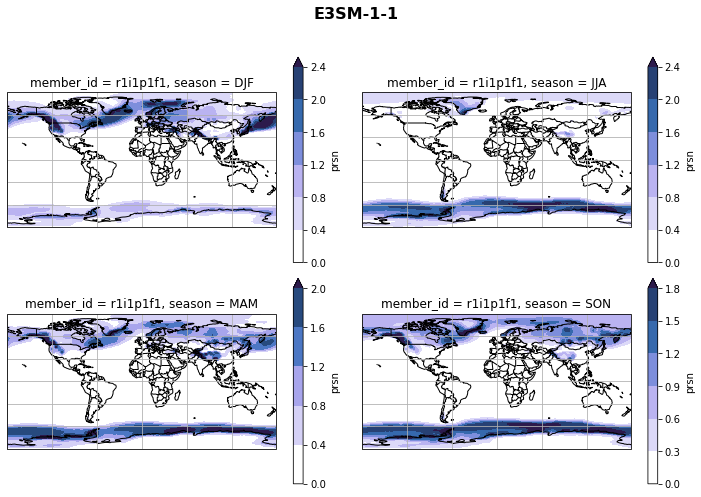

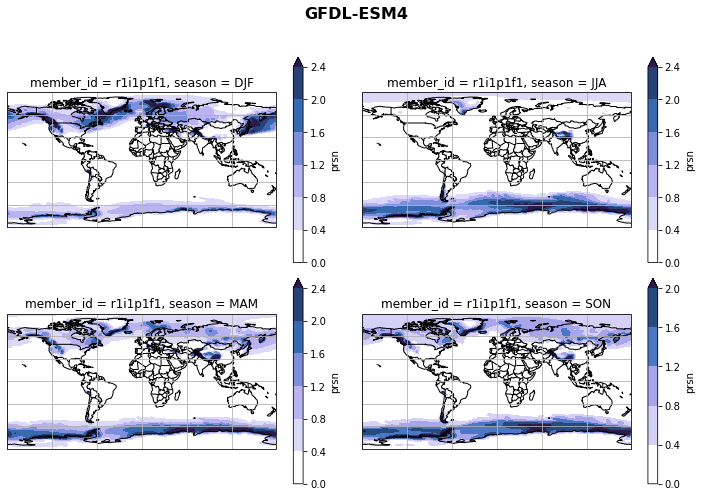

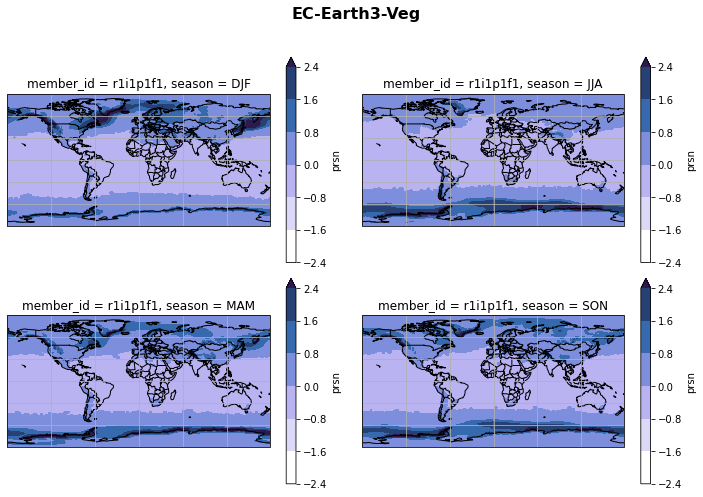

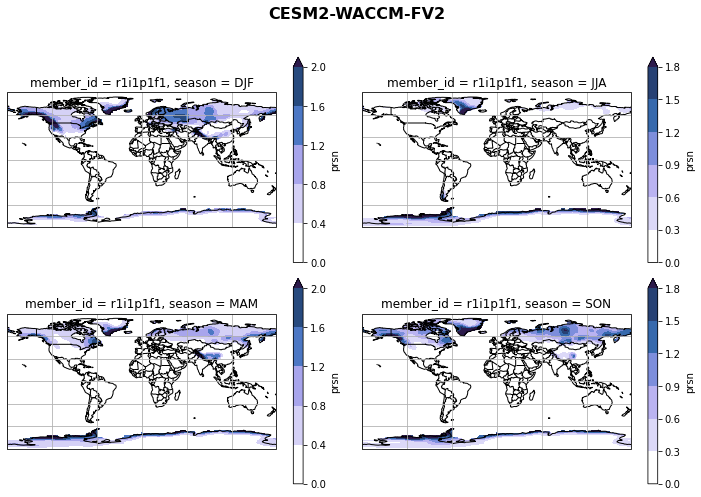

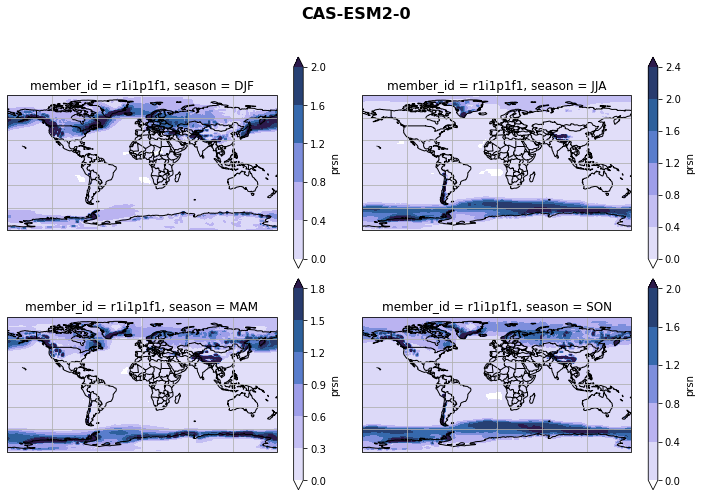

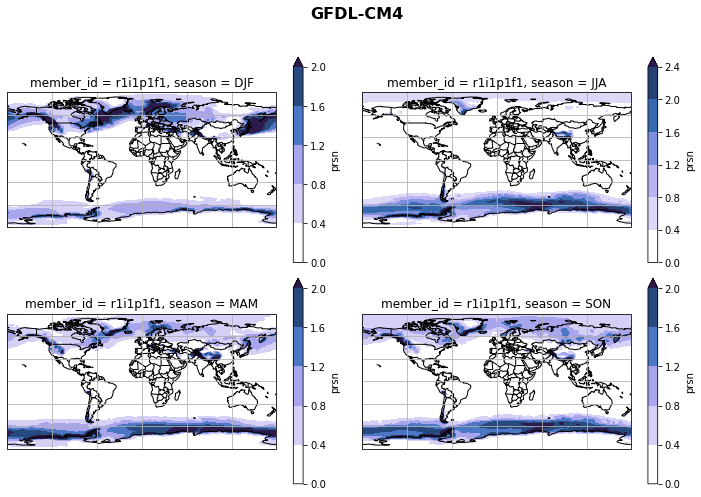

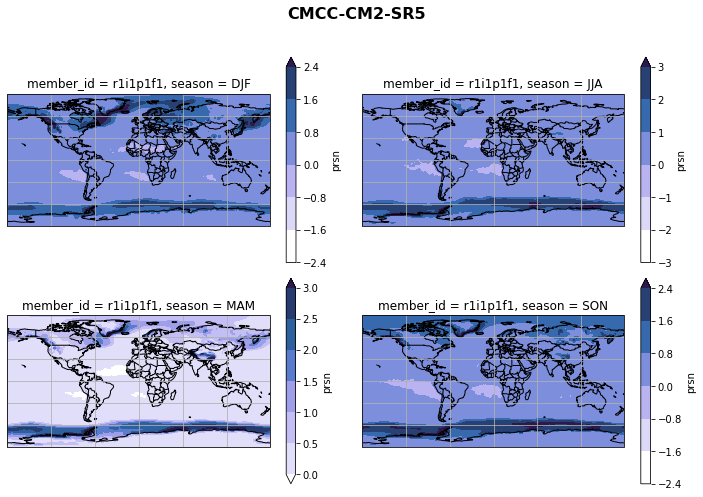

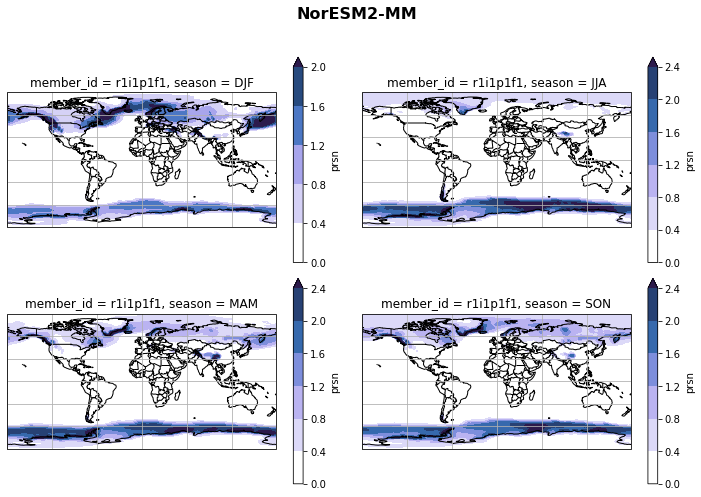

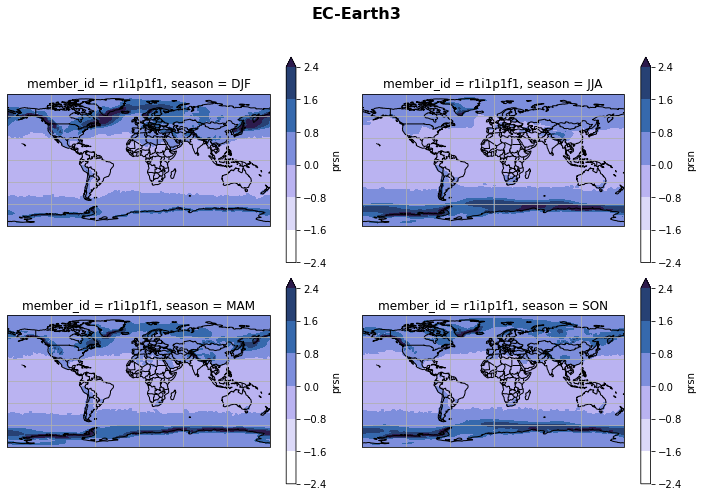

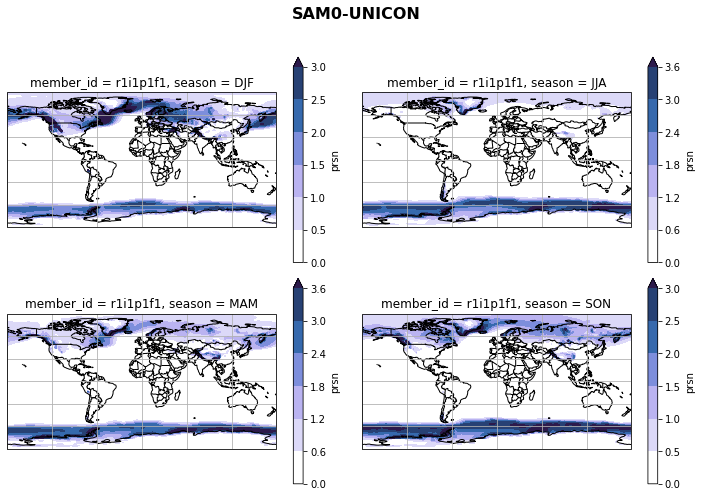

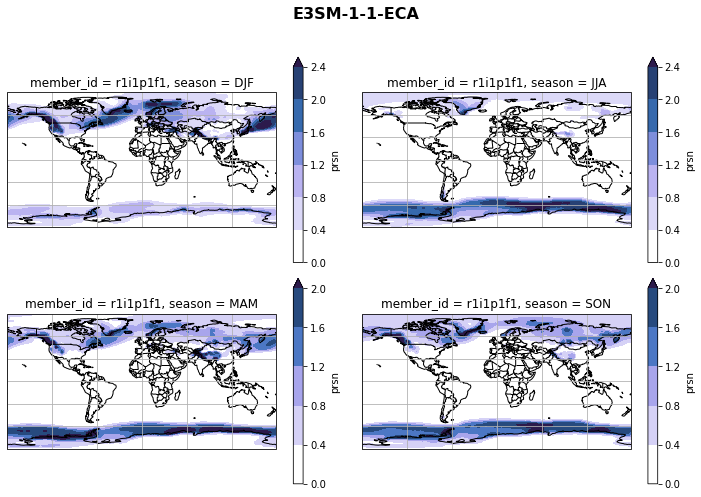

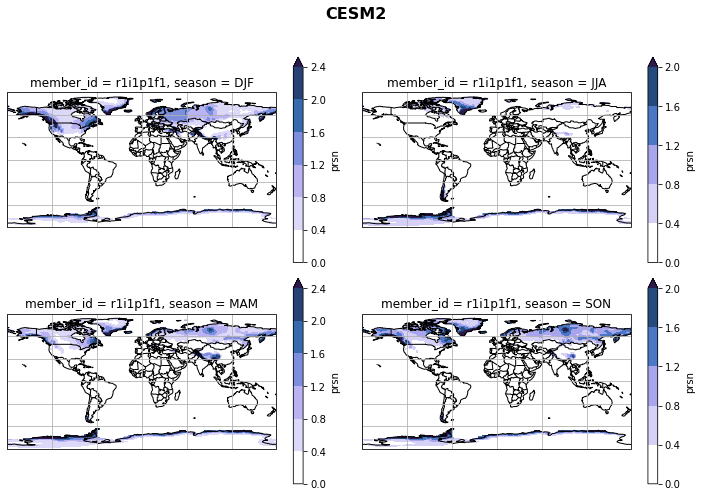

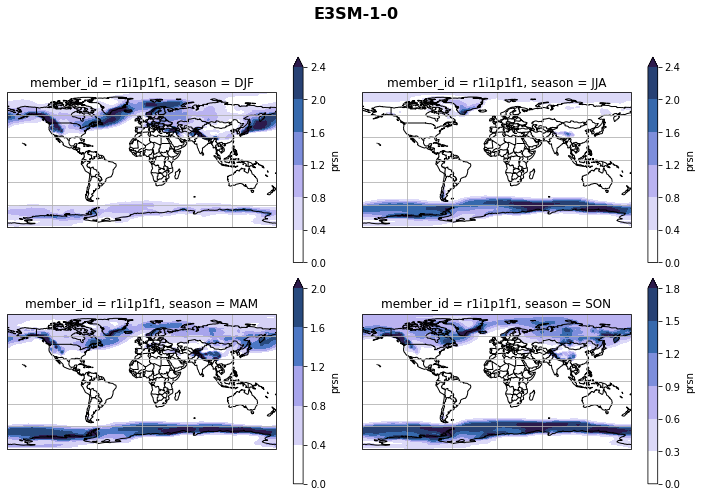

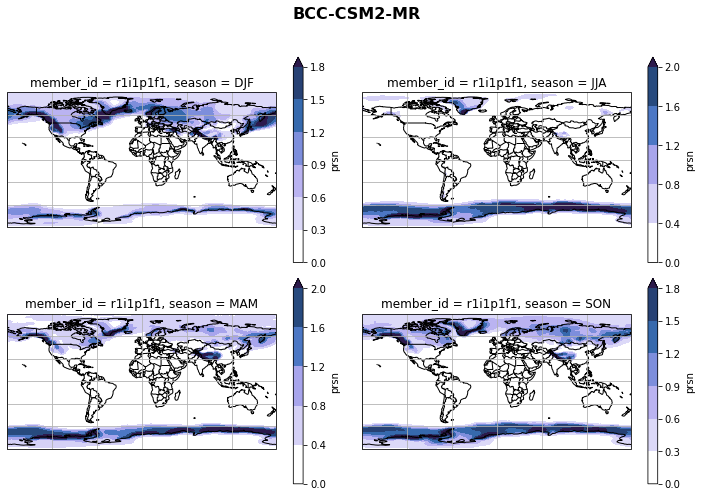

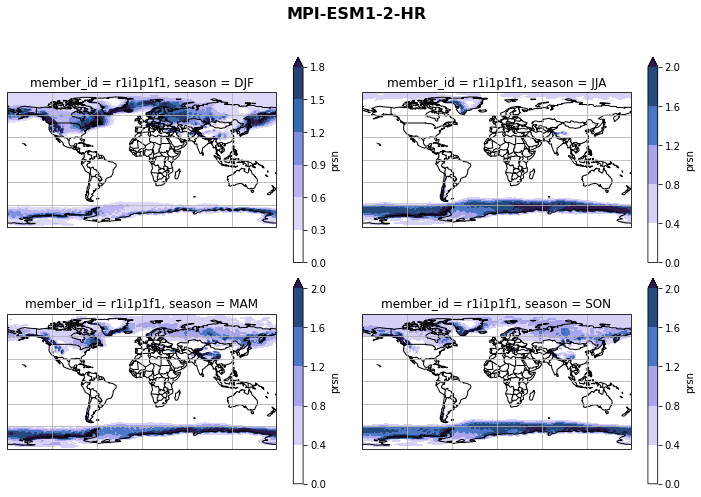

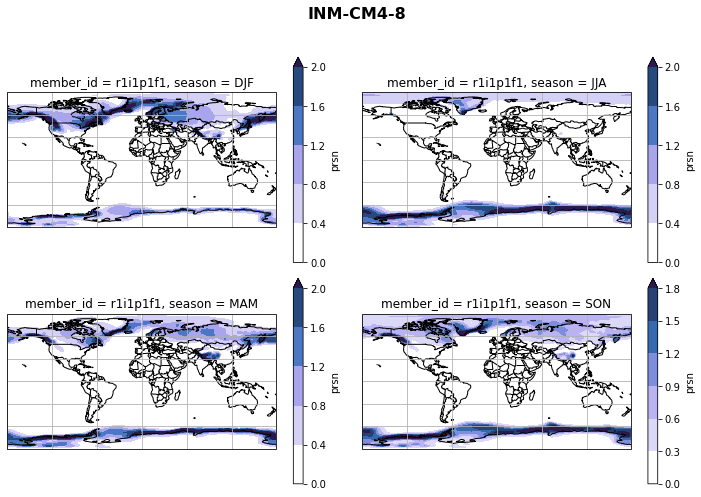

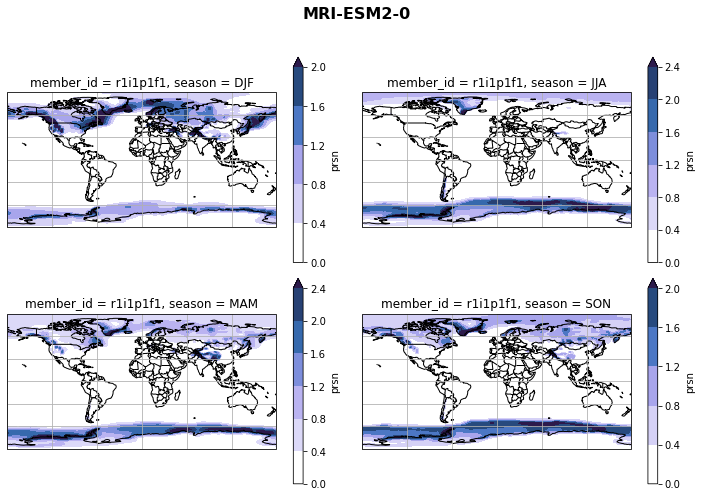

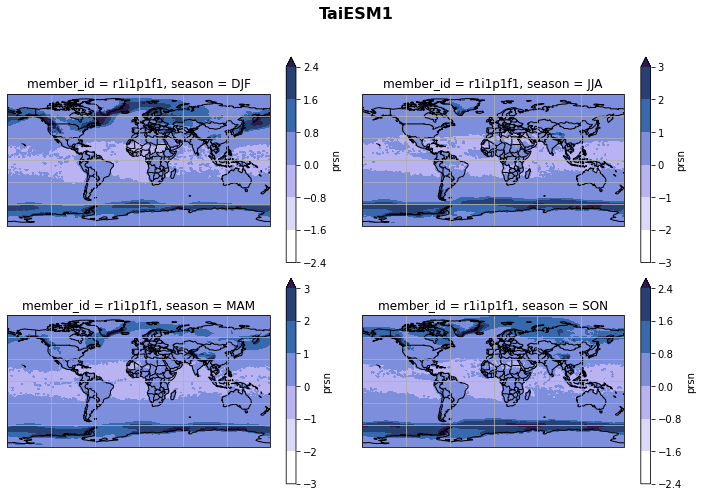

In [13]:
for model in ds_gridded_dict.keys():
    _smean = ds_gridded_dict[model].prsn.groupby('time.season').mean('time', keep_attrs=True)

    fig, axsm = plt.subplots(2,2, 
                         figsize=[10,7], 
                         subplot_kw={'projection':ccrs.PlateCarree()})
    fig.suptitle(model, fontsize=16, fontweight="bold")
    axs = axsm.flatten()

    for ax, i in zip(axs, _smean.season):
        # plot seasonal mean and convert kg m-2 s-1 to mm/day
        (_smean.sel(season = i)*86400).plot.contourf(ax=ax, 
                                     transform=ccrs.PlateCarree(),
                                     cmap=cm.devon_r, 
                                     robust=True)

        ax.coastlines()
        gl = ax.gridlines()
        ax.add_feature(cy.feature.BORDERS);
        gl.top_labels = False

    plt.tight_layout()
    fig.subplots_adjust(top=0.88)

In [14]:
# we see in the plots above, that CESM2 and CESM2-WACCM have only snowfall over land and not over ocean. We will exclude these two models for now to make it comparable to each other
# The pop() method removes the item with the specified key name:
ds_gridded_dict.pop('CESM2-WACCM-FV2')
ds_gridded_dict.pop('CESM2')

<xarray.Dataset>
Dimensions:    (time: 360, lat: 192, lon: 288, hist_interval: 2)
Coordinates:
  * time       (time) object 1985-01-15 12:00:00 ... 2014-12-15 12:00:00
    member_id  <U8 'r1i1p1f1'
  * lon        (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
Dimensions without coordinates: hist_interval
Data variables:
    prsn       (time, lat, lon) float32 dask.array<chunksize=(154, 192, 288), meta=np.ndarray>
Attributes: (12/50)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    674885.0
    branch_time_in_parent:   219000.0
    case_id:                 15
    ...                      ...
    variant_info:            CMIP6 20th century experiments (1850-2014) with ...
    variant_label:           r1i1p1f1
    netcdf_tracking_ids:     hdl:21.14100/ec0db21d-eaa1-411e-a6ed-f7c69d27e9f1
    version_id:              v20200124
    intake_esm_varname:      ['prsn']
    intake_esm_dataset_key:  CMIP.NCAR.CESM2.historical.Amon.gn

# Connect all models into one Dataset with new coordinate 'model'

In [17]:
_ds = list(ds_gridded_dict.values())
_coord = list(ds_gridded_dict.keys())
ds_prsn_cmip = xr.concat(objs=_ds, dim=_coord, coords="all").rename({'concat_dim':'model'})
ds_prsn_cmip = ds_prsn_cmip.drop('bnds')

# savet to netcdf
filename = '{}_Amon_1deg_{}01_{}12.nc'.format(variable_id[0], starty, endy)
savepath = '/scratch/franzihe/output/CMIP6_hist/1deg/'
nc_out = savepath + filename
files = glob(nc_out)

counter = 0 
# Save to netcdf file
if nc_out in files:
    print('{} is downloaded'.format(nc_out))
    counter += 1
    print('Have saved in total: {:} files'.format(str(counter)))
else:
    ds_prsn_cmip.to_netcdf(nc_out)
    print('file written: .{}'.format(nc_out))

file written: ./scratch/franzihe/output/CMIP6_hist/1deg/prsn_Amon_1deg_198501_201412.nc


# Create model and seasonal mean of all regridded models

In [19]:
prsn = ds_prsn_cmip.mean('model', keep_attrs=True, skipna = True).groupby('time.season').mean('time', keep_attrs=True, skipna = True)

# savet to netcdf
filename = '{}_season_1deg_{}_{}.nc'.format(variable_id[0], starty, endy)
nc_out = savepath + filename
files = glob(nc_out)

counter = 0 
# Save to netcdf file
if nc_out in files:
    print('{} is downloaded'.format(nc_out))
    counter += 1
    print('Have saved in total: {:} files'.format(str(counter)))
else:
    prsn.to_netcdf(nc_out)
    print('file written: .{}'.format(nc_out))

file written: ./scratch/franzihe/output/CMIP6_hist/1deg/prsn_season_1deg_1985_2014.nc


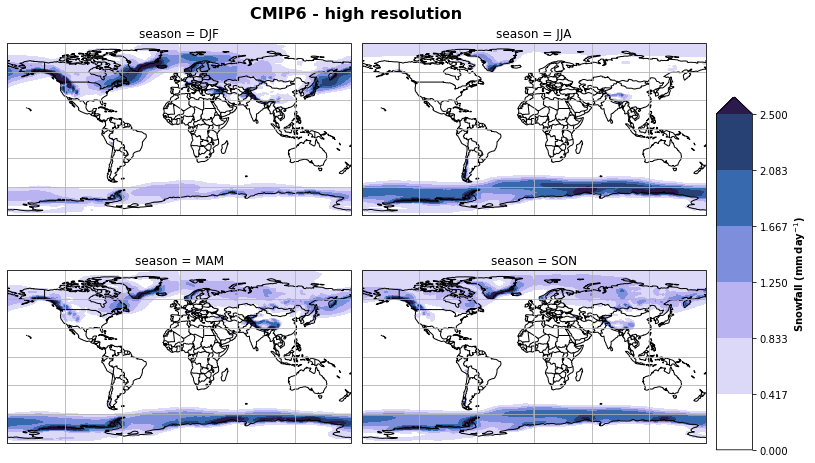

In [20]:
fig, axsm = plt.subplots(2,2, 
                         figsize=[10,7], 
                         subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle('CMIP6 - high resolution', fontsize=16, fontweight="bold")

axs = axsm.flatten()
for ax, i in zip(axs, prsn.season):
    im = (prsn.prsn.sel(season = i)*86400).plot.contourf(ax=ax, 
                                     transform=ccrs.PlateCarree(), 
                                     cmap=cm.devon_r,
                                     robust=True,
                                     vmin = 0, vmax=2.5,
                                     add_colorbar = False,
                                     extend = 'max')

    ax.coastlines()
    gl = ax.gridlines()
    ax.add_feature(cy.feature.BORDERS);
    gl.top_labels = False

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1., 0.1, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax, orientation="vertical", )
cb.set_label(label='Snowfall (mm$\,$day$^{-1}$)', weight='bold')

plt.tight_layout()
fig.subplots_adjust(top=1)
